In [114]:
import json
import gzip
from collections import defaultdict
import math
import scipy.optimize
from sklearn import svm
import numpy
import string
import random
import string
from sklearn import linear_model
import matplotlib.pyplot as plt
from nltk.stem.porter import *

In [2]:
def assertFloat(x):
    assert type(float(x)) == float

def assertFloatList(items, N):
    assert len(items) == N
    assert [type(float(x)) for x in items] == [float]*N

In [3]:
def readGz(path):
    for l in gzip.open(path, 'rt'):
        yield eval(l)

In [4]:
def readCSV(path):
    f = gzip.open(path, 'rt')
    f.readline()
    for l in f:
        u,b,r = l.strip().split(',')
        r = int(r)
        yield u,b,r

In [1]:
# f = open("ratebeer.json")

# # f = urllib.request.urlopen("https://cseweb.ucsd.edu/classes/fa22/cse258-a/data/beer_50000.json")

# count = 0
# dataset = []
# for l in f:
# #     if 'user/gender' in l:
# #         dataset.append(eval(l))

#     if count > 300000:
#         break
#     dataset.append((eval(l)))
#     count += 1

In [64]:
# f = open("goodreads_reviews_comics_graphic.json")
f = open("goodreads_reviews_young_adult.json")

# f = urllib.request.urlopen("https://cseweb.ucsd.edu/classes/fa22/cse258-a/data/beer_50000.json")

count = 0
dataset = []
for l in f:
#     if 'user/gender' in l:
#         dataset.append(eval(l))

    if count >= 500000:
        break
    dataset.append((eval(l)))
    count += 1
    


In [65]:
random.shuffle(dataset)

In [90]:
print(len(dataset))

print(dataset[0].keys())
print(dataset[0]['user_id'])
print(dataset[0]['book_id'])


print(dataset[9]['review_text'])
print(dataset[9]['rating'])


500000
dict_keys(['user_id', 'book_id', 'review_id', 'rating', 'review_text', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments'])
658c6842eb35e342f56405622a18c795
2206960
Love, love, love this book. Skate and Frank will make you hungry, Barney and Lorry will make you want puppies, Rosie will make you want to use a lot of exclamation points (!!!) Realistic fiction for which the cataloging description "children of alcoholics" was tailor-made, where love fizzles and blooms again, and Drama Queen dishes advice that sounds like it won't work, but does, if you use it right. This is a keeper. It's going right next to my copy of 
 ... teachers and librarians, this is for older teens (some sex, drugs, and alcohol involved), not middies.
5


In [67]:
def MSE(y, ypred):
    return sum([(a-b)**2 for (a,b) in zip(y,ypred)]) / len(y)

In [68]:
dataTrain = dataset[:400000]
dataValid = dataset[400000:450000]
dataTest = dataset[450000:500000]

Text(0.5, 1.0, 'Rating distribution')

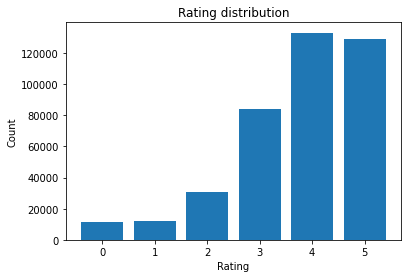

In [150]:
ratings = [d['rating'] for d in dataTrain]

ratings_count = {}

ratings_count = {rating:0 for rating in [i for i in range(0, 5+1)]}


for r in ratings:
    ratings_count[r] += 1
    
plt.bar(ratings_count.keys(), ratings_count.values())
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating distribution")
 



In [158]:
ratings_per_length = defaultdict(list)

for d in dataTrain:
    ratings_per_length[len(d['review_text']) % 50].append(d['rating'])

for key, value in ratings_per_length.items():
    ratings_per_length[key] = sum(value)/len(value)

    
    
temp = list(ratings_per_length.items())

temp.sort()
print(temp[:10])

print(temp[:10])
# from collections import OrderedDict
# import numpy as np

# ordered_length = OrderedDict(sorted(ratings_per_length.items()))

[(0, 3.7178831650262048), (1, 3.7841849468015236), (2, 3.7645997163852005), (3, 3.6500379568376533), (4, 3.7162395268605226), (5, 3.7360317854482243), (6, 3.7389003613835827), (7, 3.7694637223974765), (8, 3.8035339182009142), (9, 3.748055180997822)]
[(0, 3.7178831650262048), (1, 3.7841849468015236), (2, 3.7645997163852005), (3, 3.6500379568376533), (4, 3.7162395268605226), (5, 3.7360317854482243), (6, 3.7389003613835827), (7, 3.7694637223974765), (8, 3.8035339182009142), (9, 3.748055180997822)]


Text(0.5, 1.0, 'Average rating per review length')

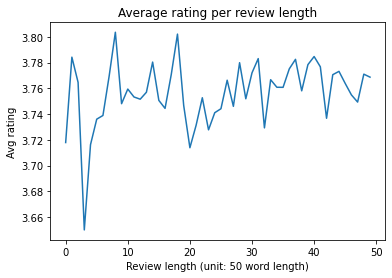

In [161]:
x = [i[0] for i in temp]
y = [i[1] for i in temp]



plt.plot(x, y)
plt.xlabel("Review length (unit: 50 word length)")
plt.ylabel("Avg rating")
plt.title("Average rating per review length")



In [162]:
#baseline 1, always predict global average

ratings = [d['rating'] for d in dataTrain]

globalAvg = sum(ratings)/len(ratings)



y = []
prediction = []

for d2 in dataTest:
    
    y.append(d2['rating'])
    prediction.append(globalAvg)
    
mse = MSE(y,prediction)

print(globalAvg)
print(mse)
    

3.7558975
1.5121064725058395


In [151]:
#baseline 1, always predict the majority of ratings

ratings = [d['rating'] for d in dataTrain]

globalAvg = sum(ratings)/len(ratings)



y = []
prediction = []

for d2 in dataTest:
    
    y.append(d2['rating'])
    prediction.append(4)
    
mse = MSE(y,prediction)

print(mse)

1.5734


In [71]:
#baseline 2, always predict user average

ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)

for d in dataTrain:
    u,i = d['user_id'],d['book_id']
    ratingsPerUser[u].append(d['rating'])
    ratingsPerItem[i].append(d['rating'])
    

y = []
prediction = []

for d in dataTest:
    y.append(d['rating'])
    
    if d['user_id'] in ratingsPerUser:
#         print('got here')
        avg = sum(ratingsPerUser[d['user_id']]) / len(ratingsPerUser[d['user_id']])
        prediction.append(avg)
    else:
        prediction.append(globalAvg)
        

mse = MSE(y,prediction)

print(mse)


1.3068304969368594


In [72]:
#baseline 3, always predict item average

y = []
prediction = []

for d in dataTest:
    y.append(d['rating'])
    
    if d['book_id']in ratingsPerItem:
        avg = sum(ratingsPerItem[d['book_id']]) / len(ratingsPerItem[d['book_id']])
        prediction.append(avg)
    else:
        prediction.append(globalAvg)
        

mse = MSE(y,prediction)

print(mse)

1.473998373541911


In [78]:
#test model 1: regression with the length of the review text


def feature(data):
    
    x = [1]
    
    x.append(len(data['review_text']))
    return x

x = []
y = []

# print(dataTrain[0]['review_text'])


xTrain = [feature(d) for d in dataTrain]

yTrain = [d['rating'] for d in dataTrain]

mod = linear_model.LinearRegression()
mod.fit(xTrain,yTrain)


xTest = [feature(d) for d in dataTrain]

yTest = [d['rating'] for d in dataTest]
yPred = mod.predict(xTest)

mse = MSE(yTest, yPred)

print(mse)






1.5121141106160725


In [142]:
#test model 2: similarity based model

def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    if denom == 0:
        return 0
    return numer / denom

reviewsPerUser = defaultdict(list)
usersPerItem = defaultdict(set)
itemsPerUser = defaultdict(set)
reviewsPerUser = defaultdict(list)
reviewsPerItem = defaultdict(list)
ratingsDict = {} # To retrieve a rating for a specific user/item pair
ratingsPerItem = defaultdict(list)
ratingsPerUser = defaultdict(list)

for d in dataTrain:
#     u,i = d['user_id'], d['book_id']
#     reviewsPerUser[u].append(d)
#     usersPerItem[i].add(u)
    
    
    user = d['user_id']
    item = d['book_id']
    review = d['review_id']
    rating = d['rating']
    
    usersPerItem[item].add(user)
    itemsPerUser[user].add(item)
    reviewsPerUser[user].append(d)
    reviewsPerItem[item].append(d)
    
    ratingsDict[(user,item)] = rating
    
    ratingsPerItem[item].append(rating)
    ratingsPerUser[user].append(rating)

In [144]:
print(len(usersPerItem))
print(len(itemsPerUser))

46684
36086


In [83]:
average_all = sum([d['rating'] for d in dataTrain]) / len(dataTrain) 

# From my HW2 solution, welcome to reuse
def predictRating(user,item):

    averageRating_i = sum([d for d in ratingsPerItem[item]])/len(ratingsPerItem[item]) \
    if len(ratingsPerItem[item]) > 0 else average_all
    
    numerator = 0
    denominator = 0
    for j in itemsPerUser[user]:#item-id
        if j == item:
            continue
        
        averageRating_j = sum([d for d in ratingsPerItem[j]])/len(ratingsPerItem[j]) \
        if len(ratingsPerItem[j]) > 0 else average_all
        
        
        R = ratingDict[(user,j)] if (user,j) in ratingDict else average_all
        
        numerator += (R - averageRating_j) * Jaccard(usersPerItem[item], usersPerItem[j])
        denominator  += Jaccard(usersPerItem[item],usersPerItem[j])
    
    return averageRating_i + numerator/denominator if denominator > 0 else averageRating_i

In [84]:
testUsers = [d['user_id'] for d in dataTest]

predictions = []

for d in dataTest:
    predictions.append(predictRating(d['user_id'], d['book_id']))

labels = [d['rating'] for d in dataTest]

mse = MSE(predictions, labels)
print(mse)

1.3372250496310019


In [85]:
#test model 3: user item biased

In [94]:
N = len(ratingsDict)

lamb = 1

beta_user_dict = {}
beta_book_dict = {}

for d in dataTrain:
    u = d['user_id']
    b = d['book_id']
    r = d['rating']
    beta_user_dict[u] = 0
    beta_book_dict[b] = 0

def getAlpha():
    result = 0
    
    for d in dataTrain:
        
        u = d['user_id']
        b = d['book_id']
        r = d['rating']
        
        result += (ratingsDict[(u,b)] - (beta_user_dict[u] + beta_book_dict[b]))
    
    
    return result / N
    
#calculates a new beta_user value for all user, so updates the global beta_user_dict
def getBetaUserForAll(alpha,lamb):
    
    for user in beta_user_dict.keys():
        temp = 0
        
        for book in itemsPerUser[user]:
            temp += (ratingsDict[(user,book)] - (alpha + beta_book_dict[book]))
        
        beta_user_dict[user] = temp /(lamb + len(itemsPerUser[user]))

    
        
    

def getBetaItemForAll(alpha,lamb):
    
    for book in beta_book_dict.keys():
        temp = 0
        
        for user in usersPerItem[book]:
            temp += (ratingsDict[(user,book)] - (alpha + beta_user_dict[user]))
        
        beta_book_dict[book] = temp / (lamb + len(usersPerItem[book]))

In [95]:
test_x = []
test_alpha = []
test_beta_u = []
test_beta_i = []
lamb = 1

for i in range(300):
    alpha = getAlpha()
    getBetaUserForAll(alpha,lamb)
    getBetaItemForAll(alpha,lamb)
    
    test_x.append(i)
    test_alpha.append(alpha)
    test_beta_u.append(beta_user_dict['658c6842eb35e342f56405622a18c795'])
    test_beta_i.append(beta_book_dict['2206960'])

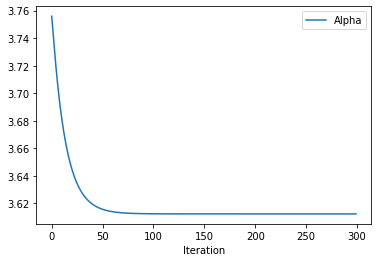

In [96]:
plt.xlabel("Iteration")
plt.plot(test_x, test_alpha, label='Alpha')
plt.legend()

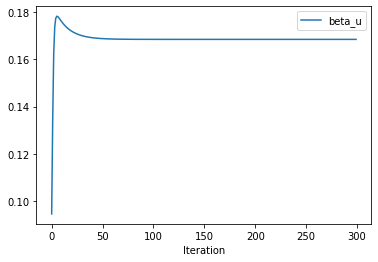

In [97]:
plt.xlabel("Iteration")
plt.plot(test_x, test_beta_u, label='beta_u')
plt.legend()

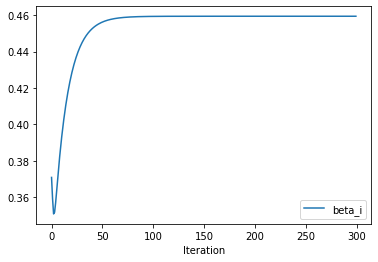

In [98]:
plt.xlabel("Iteration")
plt.plot(test_x, test_beta_i, label='beta_i')
plt.legend()

In [99]:
actual = []
prediction = []

alpha = getAlpha()

for d in dataValid:
    u = d['user_id']
    b = d['book_id']
    r = d['rating']
    
    actual.append(r)
    
    beta_u = beta_user_dict[u] if u in beta_user_dict else 0
    beta_i = beta_book_dict[b] if b in beta_book_dict else 0
    prediction.append(alpha + beta_u + beta_i)
    
validMSE = MSE(actual, prediction)
print(validMSE)

1.1794046531161664


In [101]:
lambs = [0.01, 0.1,1,10, 100,1000]
N = len(ratingsDict)

mses = []
for i in lambs:
    
    print(i)
    
    
    lamb = i

    beta_user_dict = {}
    beta_book_dict = {}

    for d in dataTrain:
        u = d['user_id']
        b = d['book_id']
        r = d['rating']
        beta_user_dict[u] = 0
        beta_book_dict[b] = 0
        
    for i in range(300):
        alpha = getAlpha()
        getBetaUserForAll(alpha,lamb)
        getBetaItemForAll(alpha,lamb)
    
    actual = []
    prediction = []

    alpha = getAlpha()

    for d in dataValid:
        u = d['user_id']
        b = d['book_id']
        r = d['rating']
        
        actual.append(r)

        beta_u = beta_user_dict[u] if u in beta_user_dict else 0
        beta_i = beta_book_dict[b] if b in beta_book_dict else 0
        prediction.append(alpha + beta_u + beta_i)

    testMSE = MSE(actual, prediction)
    mses.append(testMSE)

print(mses)

0.01
0.1
1
10
100
1000
[1.2792743554849273, 1.255171101654157, 1.1794046531161664, 1.1657497811302127, 1.2899265646667548, 1.4396521364267758]


In [102]:
lambs = [2,3,5,7,9]
N = len(ratingsDict)

mses = []
for i in lambs:
    
    print(i)
    
    
    lamb = i

    beta_user_dict = {}
    beta_book_dict = {}

    for d in dataTrain:
        u = d['user_id']
        b = d['book_id']
        r = d['rating']
        beta_user_dict[u] = 0
        beta_book_dict[b] = 0
        
    for i in range(300):
        alpha = getAlpha()
        getBetaUserForAll(alpha,lamb)
        getBetaItemForAll(alpha,lamb)
    
    actual = []
    prediction = []

    alpha = getAlpha()

    for d in dataValid:
        u = d['user_id']
        b = d['book_id']
        r = d['rating']
        
        actual.append(r)

        beta_u = beta_user_dict[u] if u in beta_user_dict else 0
        beta_i = beta_book_dict[b] if b in beta_book_dict else 0
        prediction.append(alpha + beta_u + beta_i)

    testMSE = MSE(actual, prediction)
    mses.append(testMSE)

print(mses)

2
3
5
7
9
[1.160805624079588, 1.1551222574211752, 1.1544578587505208, 1.15817592681897, 1.1631261398787478]


In [103]:
lambs = [3.5,4,4.5,4.75]
N = len(ratingsDict)

mses = []
for i in lambs:
    
    print(i)
    
    
    lamb = i

    beta_user_dict = {}
    beta_book_dict = {}

    for d in dataTrain:
        u = d['user_id']
        b = d['book_id']
        r = d['rating']
        beta_user_dict[u] = 0
        beta_book_dict[b] = 0
        
    for i in range(300):
        alpha = getAlpha()
        getBetaUserForAll(alpha,lamb)
        getBetaItemForAll(alpha,lamb)
    
    actual = []
    prediction = []

    alpha = getAlpha()

    for d in dataValid:
        u = d['user_id']
        b = d['book_id']
        r = d['rating']
        
        actual.append(r)

        beta_u = beta_user_dict[u] if u in beta_user_dict else 0
        beta_i = beta_book_dict[b] if b in beta_book_dict else 0
        prediction.append(alpha + beta_u + beta_i)

    testMSE = MSE(actual, prediction)
    mses.append(testMSE)

print(mses)

3.5
4
4.5
4.75
[1.1541345090204622, 1.153824333837463, 1.1539778556141782, 1.1541836010278903]


In [124]:
stemmer = PorterStemmer()
wordCount = defaultdict(int)
word2Count = defaultdict(int)
totalWords = 0
totalWords2 = 0
punct = string.punctuation
print(punct)
# print(dataset[0])

for d in dataTrain:
    t = d['review_text']
    t = t.lower() # lowercase string
    t = [c for c in t if not (c in punct)] # non-punct characters
    t = ''.join(t) # convert back to string
    words = t.strip().split() # tokenizes
    words2 = [' '.join(x) for x in list(zip(words[:-1],words[1:]))] 
    for w in words:
        
        totalWords += 1
        wordCount[w] += 1
        
    for w in words2:
        totalWords2 += 1
        word2Count[w] += 1
        
print(totalWords)
print(totalWords2)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
54551433
54151836


In [125]:
print(len(wordCount))
counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()
print(counts[:10])
print(counts[5000:5010])

print(len(word2Count))
counts2 = [(word2Count[w], w) for w in word2Count]
counts2.sort()
counts2.reverse()
print(counts2[:10])
print(counts2[5000:5010])

countsadd = counts
countsadd.extend(counts2)
countsadd.sort()
countsadd.reverse()
print(countsadd[:10])
print(countsadd[5000:5010])

unigrams = [w[1] for w in counts[:1000]]
print(unigrams[:10])
unigramId = dict(zip(unigrams, range(len(unigrams))))
unigramSet = set(unigrams)

bigrams = [w[1] for w in counts2[:1000]]
print(bigrams[:10])
bigramId = dict(zip(bigrams, range(len(bigrams))))
bigramSet = set(bigrams)

combined = [w[1] for w in countsadd[:1000]]
print(combined[:50])
combinedId = dict(zip(combined, range(len(combined))))
combinedSet = set(combined)

501936
[(2421645, 'the'), (1593197, 'and'), (1579380, 'i'), (1329267, 'to'), (1293552, 'a'), (1032094, 'of'), (833279, 'it'), (713619, 'this'), (709640, 'in'), (708499, 'is')]
[(629, 'joined'), (629, 'flies'), (629, 'enters'), (628, 'trees'), (628, 'purchased'), (628, 'meer'), (627, 'underneath'), (627, 're'), (627, 'ragazza'), (627, 'nell')]
6716311
[(258402, 'this book'), (241315, 'of the'), (179906, 'in the'), (143935, 'it was'), (124251, 'the book'), (116617, 'i was'), (116100, 'and i'), (107862, 'to be'), (105293, 'and the'), (98357, 'the story')]
[(1101, 'onto the'), (1100, 'they seem'), (1100, 'the stars'), (1099, 'years later'), (1099, 'weird and'), (1099, 'throne of'), (1099, 'personally i'), (1099, 'interesting characters'), (1099, 'im happy'), (1099, 'have so')]
[(2421645, 'the'), (1593197, 'and'), (1579380, 'i'), (1329267, 'to'), (1293552, 'a'), (1032094, 'of'), (833279, 'it'), (713619, 'this'), (709640, 'in'), (708499, 'is')]
[(1881, 'try and'), (1881, 'to reread'), (1881,

In [126]:
def feature_unigram(datum):
    feat = [0]*len(unigrams)
    r = ''.join([c for c in datum['review_text'].lower() if not c in punct])
    ws = r.split()
    
    for w in ws :
        
        if w in unigrams:
            feat[unigramId[w]] += 1
    feat.append(1) #offset
    return feat


def feature_bigram(datum):
    feat = [0]*len(bigrams)
    r = ''.join([c for c in datum['review_text'].lower() if not c in punct])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]
   
    for w in ws2 :
        if w in bigrams:
            feat[bigramId[w]] += 1
    feat.append(1) #offset
    return feat


def feature_combined(datum):
    feat = [0]*len(combined)
    r = ''.join([c for c in datum['review_text'].lower() if not c in punct])
    ws = r.split()
    ws2 = [' '.join(x) for x in list(zip(ws[:-1],ws[1:]))]

    for w in ws + ws2 :
        
        if w in combined:
            feat[combinedId[w]] += 1
    feat.append(1) #offset
    return feat

In [163]:
#unigram

X_train = [feature_unigram(d) for d in dataTrain]
y_train = [d['rating'] for d in dataTrain]
print(X_train[0][:20])
X_test = [feature_unigram(d) for d in dataTest]
y_test = [d['rating'] for d in dataTest]


clf = linear_model.Ridge(1.0, fit_intercept=False) # MSE + 1.0 l2
clf.fit(X_train, y_train)
theta = clf.coef_
pred_train = clf.predict(X_train)
MSEtrain = sum((y_train - pred_train)**2)/len(y_train)
pred_test = clf.predict(X_test)
MSEtest = sum((y_test - pred_test)**2)/len(y_test)
print(theta[:20])
print("MSEtrain = ",MSEtrain)
print("MSEtest = ",MSEtest)

weights = list(zip(theta, unigrams + ['constant_feat']))
weights.sort()
weights.reverse()
print(weights[:10])
print(weights[-10:])

[3, 5, 11, 5, 2, 0, 3, 0, 1, 0, 1, 2, 0, 1, 2, 1, 0, 0, 1, 0]
[-0.00845176  0.00354154 -0.00226518 -0.00127897  0.00145464  0.00358557
  0.00403733 -0.01336234  0.00841195  0.00289315  0.0043674  -0.00719683
  0.01654257 -0.02114343 -0.00057829 -0.01672578 -0.0034812   0.00734639
  0.01433373  0.00429534]
MSEtrain =  1.2427536574335627
MSEtest =  1.2534802794968676
[(0.01654256706430839, 'constant_feat'), (0.008411954489346327, 'is'), (0.00436739713573368, 'a'), (0.0040373324621943325, 'things'), (0.00358556657419601, 'end'), (0.0035415415922456484, 'a'), (0.0028931538782052697, 'such'), (0.0014546447058327932, 'to'), (-0.001278969169012969, 'way'), (-0.00226518126970497, 'good')]
[(0.0040373324621943325, 'things'), (0.00358556657419601, 'end'), (0.0035415415922456484, 'a'), (0.0028931538782052697, 'such'), (0.0014546447058327932, 'to'), (-0.001278969169012969, 'way'), (-0.00226518126970497, 'good'), (-0.007196827697535721, 'gem'), (-0.008451763859168498, 'what'), (-0.01336234448746083

In [170]:
weights = list(zip(theta, unigrams + ['constant_feat']))
weights.sort()
weights.reverse()
print(weights[:11])
print(weights[-10:])

print(len(theta))
print(len(unigrams))
print(len(weights))

[(3.681639361663302, 'constant_feat'), (0.29513687122548404, '45'), (0.26849563824789097, 'wait'), (0.2674808768471193, 'wow'), (0.22153305578809715, 'highly'), (0.20824612728907332, 'fantastic'), (0.19998337223789725, '5'), (0.17868955054124855, 'loved'), (0.17327257551916705, 'awesome'), (0.1644959981000308, 'wonderful'), (0.16082511053673462, 'amazing')]
[(-0.11256505434725689, 'pages'), (-0.1194402390243701, 'rating'), (-0.1212570584401547, 'couldnt'), (-0.13521319847163557, 'nothing'), (-0.14419936805820951, 'interest'), (-0.18060780298799683, 'annoying'), (-0.2013145508344305, '35'), (-0.22957135678829324, 'disappointed'), (-0.3186367614684295, 'finish'), (-0.3669879004575533, 'boring')]
1001
1000
1001


In [128]:
#bigram

X_train = [feature_bigram(d) for d in dataTrain]
y_train = [d['rating'] for d in dataTrain]
print(X_train[0][:20])
X_test = [feature_bigram(d) for d in dataTest]
y_test = [d['rating'] for d in dataTest]


clf = linear_model.Ridge(1.0, fit_intercept=False) # MSE + 1.0 l2
clf.fit(X_train, y_train)
theta = clf.coef_
pred_train = clf.predict(X_train)
MSEtrain = sum((y_train - pred_train)**2)/len(y_train)
pred_test = clf.predict(X_test)
MSEtest = sum((y_test - pred_test)**2)/len(y_test)
print(theta[:20])
print("MSEtrain = ",MSEtrain)
print("MSEtest = ",MSEtest)

weights = list(zip(theta, words + ['constant_feat']))
weights.sort()
weights.reverse()
print(weights[:5])
print(weights[-5:])

[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0]
[ 0.01902711 -0.00056935  0.00654624 -0.01252823 -0.02008132  0.0139206
 -0.00530054 -0.00868789 -0.00169455 -0.00816178  0.01448593  0.00943482
 -0.03265857  0.00017892  0.00087171 -0.03082975  0.04042193  0.00185674
 -0.02823431  0.02252886]
MSEtrain =  1.2582595568622652
MSEtest =  1.268131968773179
[(0.01902710904037674, 'what'), (0.014485928542855303, 'a'), (0.013920598004712886, 'end'), (0.009434822692431776, 'gem'), (0.006546244970783695, 'good')]
[(-0.008161777995736672, 'such'), (-0.008687890910739295, 'noah'), (-0.012528228588451101, 'way'), (-0.020081323104258784, 'to'), (-0.03265857378294216, 'constant_feat')]


In [129]:
#combined

X_train = [feature_combined(d) for d in dataTrain]
y_train = [d['rating'] for d in dataTrain]
print(X_train[0][:20])
X_test = [feature_combined(d) for d in dataTest]
y_test = [d['rating'] for d in dataTest]



clf = linear_model.Ridge(1.0, fit_intercept=False) # MSE + 1.0 l2
clf.fit(X_train, y_train)
theta = clf.coef_
pred_train = clf.predict(X_train)
MSEtrain = sum((y_train - pred_train)**2)/len(y_train)
pred_test = clf.predict(X_test)
MSEtest = sum((y_test - pred_test)**2)/len(y_test)
print(theta[:20])
print("MSEtrain = ",MSEtrain)
print("MSEtest = ",MSEtest)

weights = list(zip(theta, words + ['constant_feat']))
weights.sort()
weights.reverse()
print(weights[:5])
print(weights[-5:])

[3, 5, 11, 5, 2, 0, 3, 0, 1, 0, 1, 2, 0, 1, 2, 1, 0, 0, 1, 0]
[-0.00584763  0.00400016  0.00283239 -0.00218026  0.00142805  0.0007988
 -0.00208142 -0.0151843   0.00625376 -0.0059824   0.00227517 -0.0170849
  0.04528335 -0.00449631 -0.00095322 -0.00256337  0.00258455  0.00555088
  0.01137452  0.00592072]
MSEtrain =  1.2111017451032198
MSEtest =  1.226626594932868
[(0.04528335165939631, 'constant_feat'), (0.006253763273504243, 'is'), (0.004000163746106162, 'a'), (0.0028323861025444097, 'good'), (0.002275171791615265, 'a')]
[(-0.002180257245596036, 'way'), (-0.005847627408562655, 'what'), (-0.005982399431116008, 'such'), (-0.015184304351669944, 'noah'), (-0.01708490476809017, 'gem')]


In [133]:
#test model 4: combination of biased term and text sentiment analysis

In [136]:
lamb = 4
N = len(ratingsDict)

beta_user_dict = {}
beta_book_dict = {}

for d in dataTrain:
    u = d['user_id']
    b = d['book_id']
    r = d['rating']
    beta_user_dict[u] = 0
    beta_book_dict[b] = 0

for i in range(300):
    alpha = getAlpha()
    getBetaUserForAll(alpha,lamb)
    getBetaItemForAll(alpha,lamb)

In [175]:

# print(beta_user_dict)

prediction = []
actual = []

for i in range(len(dataTest)):
    d = dataTest[i]
    
    u = d["user_id"]
    b = d['book_id']
    r - d['rating']
    
    actual.append(r)
    
    offset_user = 0
    offset_item = 0
    
    if u in beta_user_dict:
        offset_user = beta_user_dict[u]
    
    if b in beta_book_dict:
        offset_item = beta_book_dict[b]
    
    prediction.append(pred_test[i] + offset_item)

mse = MSE(actual, prediction)

print(mse)
    
    
    

0.4777076087609362
